In [1]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file = "arxiv.csv"
png_file = "arxiv.png"

df = pd.read_csv(csv_file, parse_dates=True, index_col="date")

In [2]:
df_list = []

for query in sorted(set(df["topic"])):
    df_sub = df[df["topic"] == query]
    df_samp = df_sub.resample("M").sum()
    df_list.append(df_samp.rename(columns={ "counts": query }))

In [3]:
df_full = pd.concat(df_list, axis=1, join="inner").reindex(df_samp.index).fillna(0)

# delete min value as an outlier
df_full = df_full.iloc[1: , :]

# drop last row – to let arXiv settle
df_full.drop(df_full.tail(1).index, inplace=True)

df_full

,graph algorithms,graph neural networks,knowledge graph
date,,,
2020-01-31,159,71,59
2020-02-29,230,112,71
2020-03-31,202,120,77
2020-04-30,234,90,86
2020-05-31,215,103,76
2020-06-30,264,179,108
2020-07-31,278,141,87
2020-08-31,226,105,60
2020-09-30,254,144,108


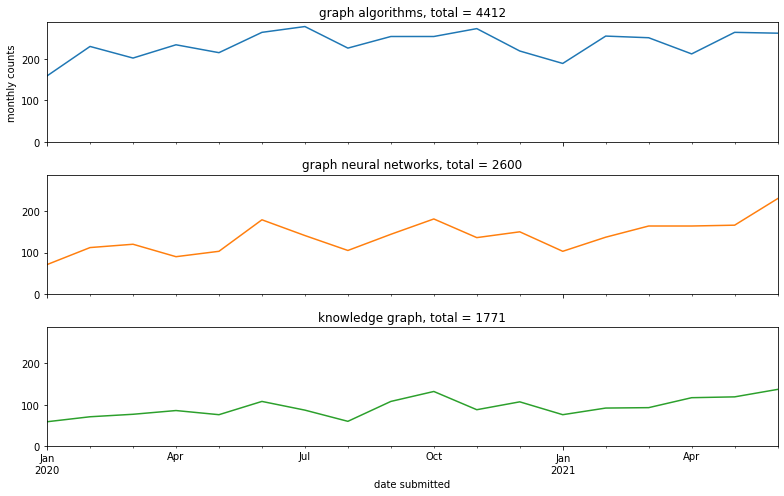

In [4]:
plot = df_full.plot(
    subplots=True,
    legend=False,
    figsize=(11, 7),
    xlabel="date submitted"
)

plot[0].set(ylabel="monthly counts")

summary = list(df.groupby("topic").sum().to_dict()["counts"].items())
y_max = round(max(df_full.max(axis=1)) + 10.0)

for index, ax in enumerate(plot):
    query, count = summary[index]
    ax.set(ylim=(0, y_max), title=f"{query}, total = {count}")

fig = plot[0].get_figure()
fig.tight_layout()
fig.savefig(png_file)